# Decision Tree 

## What is a Decision Tree?
A decision tree is a flowchart-like tree structure where an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The root node is the starting point of the tree, and the leaf nodes contain the final decisions or predictions.

## Components of a Decision Tree
- **Root Node**: It represents the entire population or sample, which further gets divided into two or more homogeneous sets.
- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.
- **Leaf Node (Terminal Node)**: Nodes with no children (no further splits) are called leaf nodes.
- **Branch (or Edge)**: A branch represents a decision rule, and it is the outcome of a split on an attribute.

## How Does a Decision Tree Work?
A decision tree splits the nodes on all available variables and then selects the split that results in the most homogeneous sub-nodes. The process is recursive in nature and is known as recursive partitioning. The recursion is completed when the node either contains only one class (pure node) or when it cannot be split into further sub-nodes (pruning might be applied).

## Key Decision Tree Algorithms
- **CART (Classification and Regression Trees)** – uses Gini Index(Classification) as a metric.
- **ID3 (Iterative Dichotomiser 3)** – uses Entropy function and Information gain as metrics.

## Pros and Cons of Decision Trees
### Pros:
- Simple to understand, interpret, and visualize.
- Can handle both numerical and categorical data.
- Requires little data preparation compared to other algorithms.

### Cons:
- Prone to overfitting, especially with complex trees.
- Can be unstable because small variations in data can result in a completely different tree being generated.
- Biased with imbalanced datasets, so balanced datasets are preferred.

The image below represents a typical decision tree, demonstrating the flow from a single root node through various decision nodes that lead to the final leaf nodes, which provide the decision or prediction output.
![alt text](Decision_Tree_Example1.jpeg)


# Decision Tree Classifier for Titanic Survival Prediction

This Jupyter notebook demonstrates the use of a decision tree classifier to predict the survival of passengers on the Titanic. We will preprocess the data, build a decision tree model, train it, and evaluate its performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


## Load and Explore the Dataset

We begin by loading the Titanic dataset and examining its structure to understand the available features.


In [2]:
# Load the dataset
data = pd.read_csv('C:/Users/78641/Downloads/titanic.csv')

# Display the first few rows of the dataframe
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Display general information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Data Preprocessing

We need to prepare the data for our decision tree model. This involves handling missing values, converting categorical variables to numeric, and splitting the dataset into training and testing sets.


In [4]:
# Handling missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Converting categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Selecting features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building and Training the Decision Tree Model

We will create a decision tree classifier and train it on our data.


In [5]:
# Creating the decision tree classifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Training the model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

## Model Evaluation

Let's evaluate the decision tree's performance on the test data.


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[96  9]
 [27 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



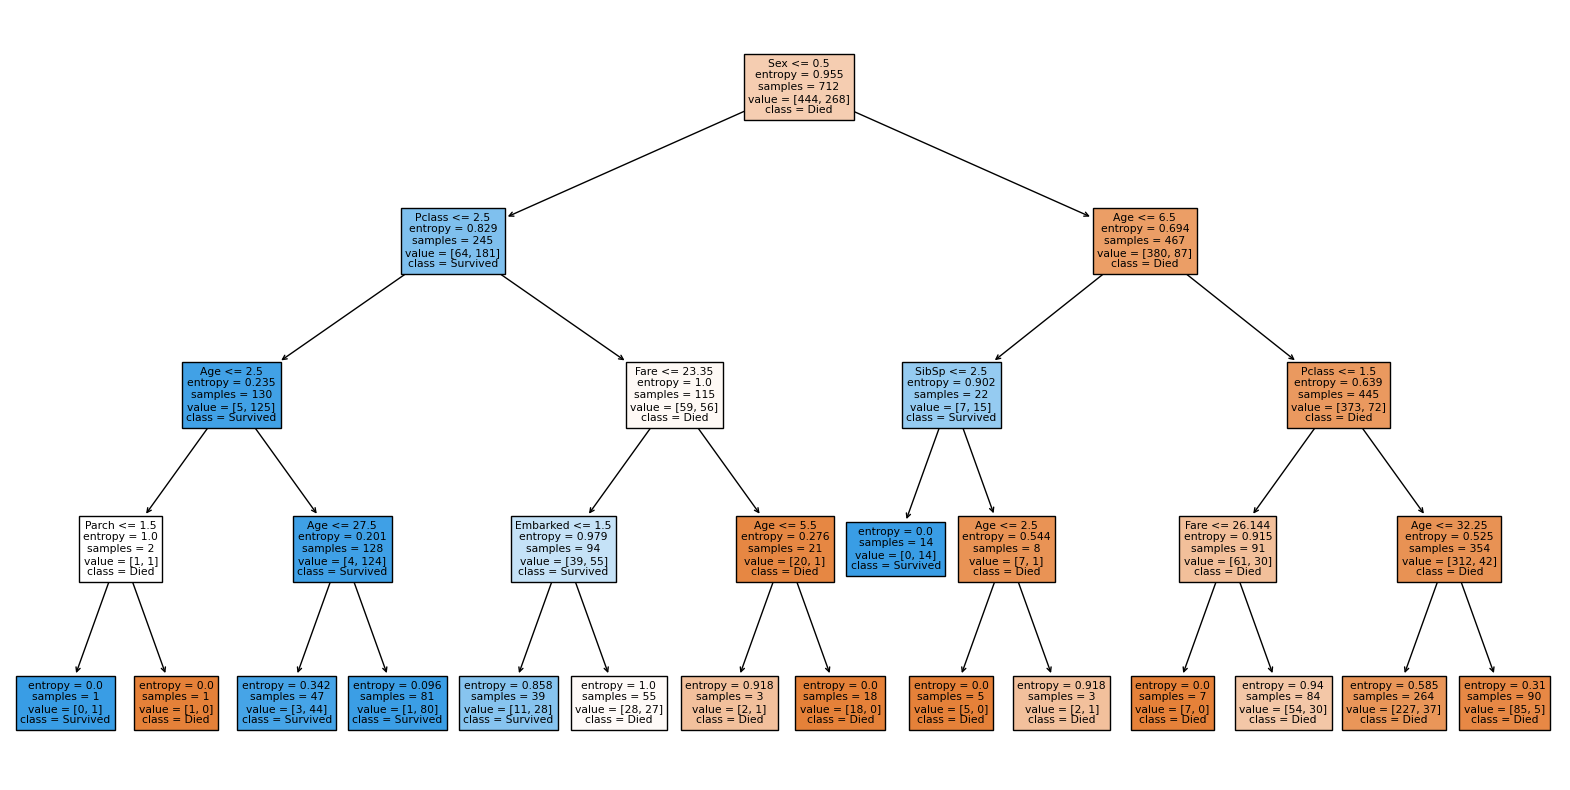

In [6]:
# Making predictions
y_pred = dtree.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=features, class_names=['Died', 'Survived'])
plt.show()


# Decision Tree Model Performance Analysis

## Model Accuracy and Overview
The decision tree model has achieved an accuracy of roughly 79.89% on the test set. This level of accuracy is indicative of a model with good predictive power, given the challenging nature of predicting human survival in a disaster.

## Performance Metrics

### Precision
- **Non-Survivors (Class 0)**: The model has a precision of 0.78, which means it is quite accurate in predicting the negative class (non-survivors).
- **Survivors (Class 1)**: The model's precision is 0.84 for the positive class (survivors), showing a higher accuracy when predicting survival.

### Recall
- **Non-Survivors (Class 0)**: With a recall of 0.91, the model is adept at identifying the majority of actual non-survivor cases.
- **Survivors (Class 1)**: The recall for survivors is 0.64, suggesting that the model is missing around 36% of the actual survivors.

### F1-Score
- **Non-Survivors (Class 0)**: The F1-score is 0.84, indicating a strong balance between precision and recall for predicting non-survivors.
- **Survivors (Class 1)**: An F1-score of 0.72 for survivors points to an area for potential improvement.

## Confusion Matrix Insights

- **True Negatives (Non-Survivors Correctly Identified)**: 96
- **False Positives (Non-Survivors Incorrectly Labeled as Survivors)**: 9
- **False Negatives (Survivors Incorrectly Labeled as Non-Survivors)**: 27
- **True Positives (Survivors Correctly Identified)**: 47

The confusion matrix results show that the model is more conservative in predicting survival, as evidenced by a higher number of false negatives (actual survivors predicted as non-survivors).

## Concluding Remarks
The decision tree model shows a commendable performance, particularly in identifying non-survivors. However, it could benefit from improvements in predicting survivors. Approaches such as feature engineering, hyperparameter optimization, or the application of more sophisticated modeling techniques like ensemble methods might help enhance the model's sensitivity and overall predictive accuracy.


## Decision Region Visualization

After training our decision tree model on the Titanic dataset, we aim to visualize the decision regions. Given that our dataset has more than two dimensions, we use Principal Component Analysis (PCA) to reduce it to two principal components. This allows us to project our data onto a 2D plane and plot the decision boundaries as determined by our model.

The following plot shows the decision regions in the space of the first two principal components. Each region is associated with a decision made by the tree, either predicting survival or non-survival, given the reduced feature set.


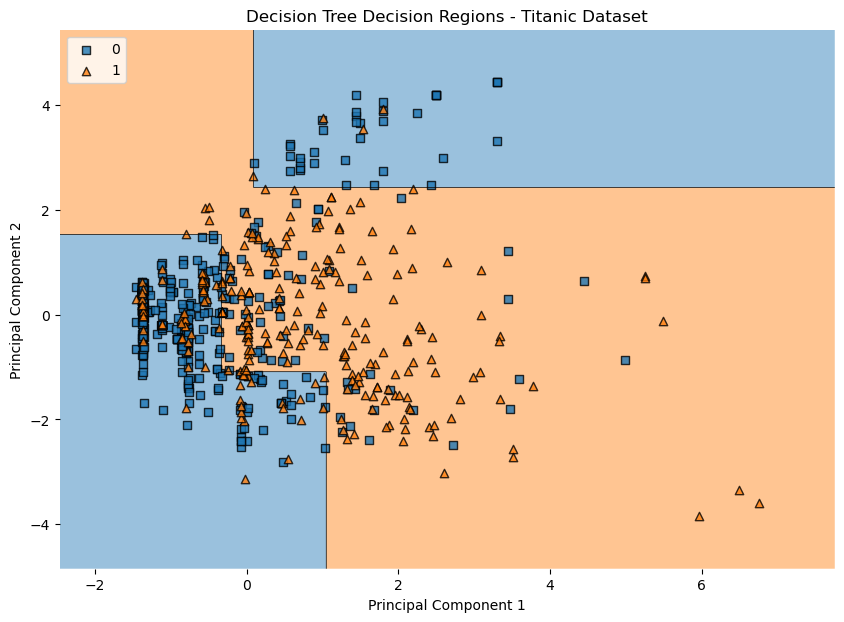

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train the decision tree classifier on the 2D data
dtree_pca = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dtree_pca.fit(X_train_pca, y_train)

# Plotting the decision regions
plt.figure(figsize=(10, 7))
plot_decision_regions(X_train_pca, y_train.to_numpy(), clf=dtree_pca, legend=2)

# Adding titles and labels
plt.title('Decision Tree Decision Regions - Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.show()

## Analysis of Decision Tree Decision Regions

The decision region plot illustrates how the decision tree model classifies the Titanic dataset after dimensionality reduction using PCA. Two principal components are derived to project the multi-dimensional data into a two-dimensional space.

### Observations from the Plot

- The plot showcases distinct regions where the decision tree model predicts survival (`1`) and non-survival (`0`). The orange region corresponds to predicted non-survival, while the blue region corresponds to predicted survival.

- Data points are represented as squares for non-survivors and triangles for survivors. We observe that a significant number of points are correctly classified within their respective regions, corroborating the accuracy observed during model evaluation.

- There is a notable overlap of classes within the central region of the plot. This indicates that for these data points, the survival outcome is not easily separable based on the first two principal components alone. 

- The decision boundary appears to be linear, which suggests that the model makes its decisions based on linear combinations of the two principal components.

### Implications

- The regions indicate that the model has learned a decision rule that can largely separate the two classes, although there are several instances of misclassification. This is expected given the model's accuracy of around 80%.

- The overlap in the central region suggests that some feature interactions or non-linear relationships are not fully captured by a single decision tree using only the first two principal components. 

- The linear nature of the boundary in the 2D space might not fully represent the actual complexity of the decision boundaries in the higher-dimensional space of the original dataset.

### Conclusion

The visualization provides a useful perspective on the model's predictions, but it is essential to consider the limitations of interpreting PCA-reduced data. The reduced dimensions may not encapsulate all the nuances that a decision tree would use in higher-dimensional space. For further model improvements, techniques such as feature engineering, model complexity adjustment, or ensemble methods could be explored to enhance the separation between classes and reduce misclassification.


## Actual vs Predicted Comparison Visualization

The bar chart below shows the comparison between the actual and predicted counts of each class from the Titanic dataset. This visualization provides a clear indication of the model's performance in predicting the survival (Class 1) and non-survival (Class 0) of the passengers.

- **Sky Blue Bars**: Represent the actual number of instances for each class in the test dataset.
- **Orange Bars**: Represent the predicted number of instances for each class by the model.

By comparing the height of the bars for each class, we can visually assess the model's ability to predict each class accurately. Discrepancies between the actual and predicted counts indicate prediction errors, which can direct further model tuning and validation efforts.


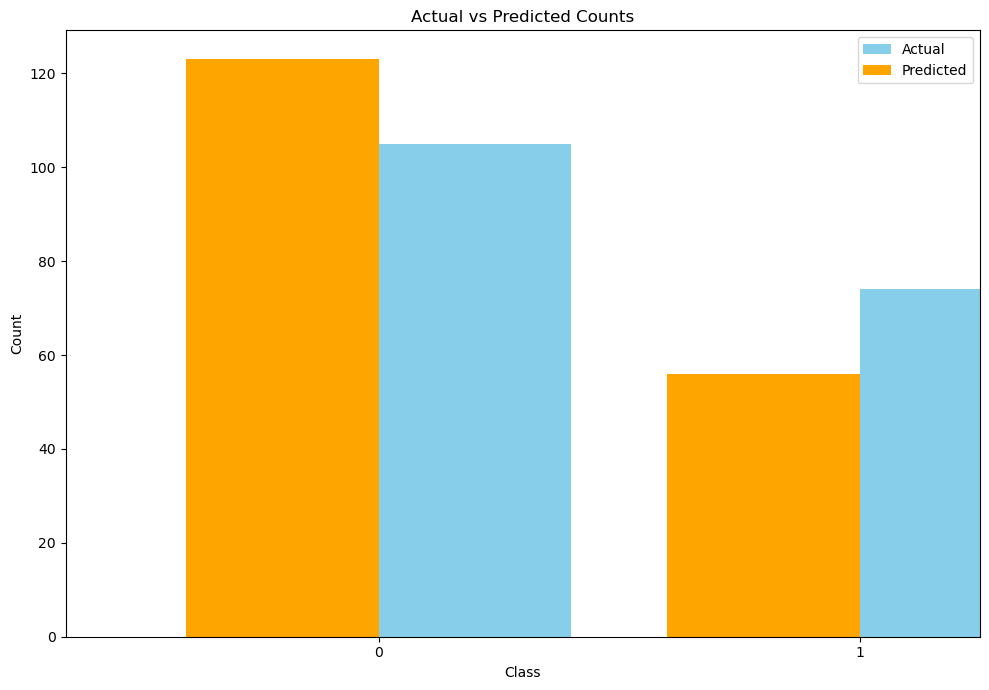

In [11]:
import seaborn as sns

# Create a DataFrame with actual and predicted values
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count the occurrences of each class in actual and predicted
comparison_counts = df_comparison.apply(pd.Series.value_counts).fillna(0)

# Plot the actual vs predicted counts
fig, ax = plt.subplots(figsize=(10, 7))

# Create a bar plot for actual counts
comparison_counts['Actual'].plot(kind='bar', width=0.4, color='skyblue', position=0, label='Actual', ax=ax)

# Create a bar plot for predicted counts
comparison_counts['Predicted'].plot(kind='bar', width=0.4, color='orange', position=1, label='Predicted', ax=ax)

# Setting the labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Counts')
ax.set_xticklabels(comparison_counts.index, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

## Analysis of Actual vs Predicted Counts

The bar chart presents the actual and predicted counts of passenger survival outcomes. It reveals:

- **Class 0 (Did Not Survive)**: The model predicted non-survival slightly more often than it actually occurred, indicating a conservative tendency in predictions.
- **Class 1 (Survived)**: The model underpredicted survival, suggesting that it may be less sensitive to factors indicating survival or that these factors are less prevalent or consistent in the training data.

### Observations:
- The model has a higher accuracy in predicting non-survivors than survivors.
- The discrepancy in survival predictions points to possible improvements in detecting survival patterns.

